In [3]:

!pip install seaborn

監督式學習(有答案的)

模型斜率 (coef_): [[2.94615702]]
模型截距 (intercept_): [4.09324151]
預測結果 (y_pred): [[4.09324151]
 [9.98555555]]


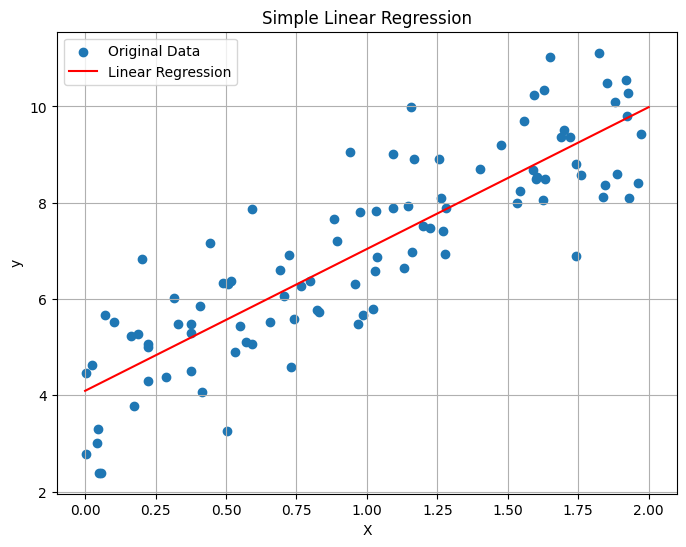

In [4]:
# 匯入必要的套件
import numpy as np                     # 用來做數值運算與建立矩陣
import matplotlib.pyplot as plt         # 用來繪圖
from sklearn.linear_model import LinearRegression, LogisticRegression  # 匯入線性與邏輯回歸模型（本例使用線性回歸）

# 設定隨機種子，讓每次產生的亂數結果一致（方便重現結果）
np.random.seed(5)

# === 建立虛擬資料 ===
# 產生 100 筆隨機的自變數 X，範圍是 0 到 2 之間
X = 2 * np.random.rand(100, 1)

# 根據線性關係 y = 4 + 3X + 雜訊 產生對應的目標變數 y
# np.random.randn(100, 1) 會產生平均值為0、標準差為1的常態分佈雜訊
y = 4 + 3 * X + np.random.randn(100, 1)

# === 建立線性回歸模型 ===
model = LinearRegression()

# 使用訓練資料 (X, y) 進行模型訓練
model.fit(X, y)

# 輸出模型的係數（斜率）與截距（常數項）
print("模型斜率 (coef_):", model.coef_)
print("模型截距 (intercept_):", model.intercept_)

# === 使用模型進行預測 ===
# 建立新的自變數資料，用來預測對應的 y 值
X_new = np.array([[0], [2]])

# 使用模型進行預測
y_pred = model.predict(X_new)
print("預測結果 (y_pred):", y_pred)

# === 視覺化結果 ===
plt.figure(figsize=(8, 6))  # 設定圖表大小

# 繪製原始資料的散佈圖
plt.scatter(x=X, y=y, label='Original Data')

# 繪製線性回歸模型的預測線（紅色直線）
plt.plot(X_new, y_pred, 'r-', label='Linear Regression')

# 加上標籤與標題
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')

# 顯示圖例與格線
plt.legend()
plt.grid()

# 顯示整張圖
plt.show()


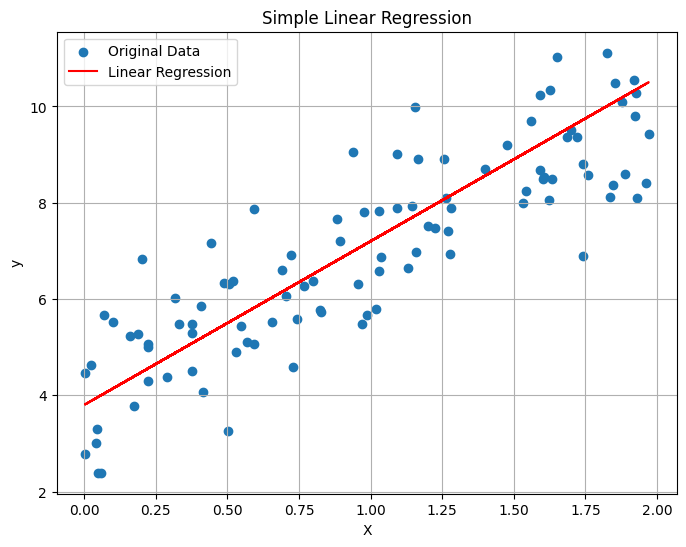

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression , LogisticRegression

np.random.seed(5)
#產生虛擬資料100筆
X = 2*np.random.rand(100,1)
y = 4+ 3*X + np.random.randn(100,1)
#模型建立
#線性回歸方程式假設: y=3.8+3.4X
random_w = 3.4
random_b = 3.8

#預測
y_pred = random_w * X + random_b


#視覺化
# 設定圖表大小
plt.figure(figsize=(8,6))
# 繪製原始資料的散佈圖
plt.scatter(x=X,y=y,label='Original Data')
# 繪製線性回歸模型的預測線（紅色直線）
plt.plot(X,y_pred,'r-',label='Linear Regression')
#標籤
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')

plt.legend()#圖例
plt.grid(True)#格線
plt.show()

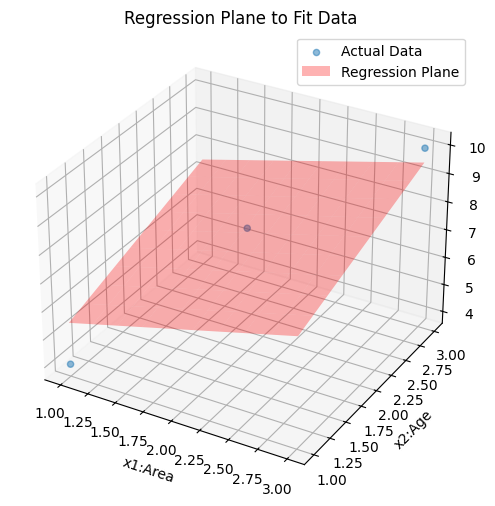

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')#第一行 第一列 第一個 projection='3d' 3D投影

X = [1,2,3]
Y = [1,2,3]
Z = [4,8,10]

ax.scatter(X,Y,Z, label = 'Actual Data', alpha = 0.5)
x1_surf = np.linspace(1,3,10) #超平面的x座標陣列
x2_surf = np.linspace(1,3,10) #超平面的y座標陣列
x1_surf,x2_surf = np.meshgrid(x1_surf,x2_surf)
learned_w1 = 1
learned_w2 = 1
learned_b = 3.5

Y_surf = learned_w1 * x1_surf + learned_w2 * x2_surf +learned_b
ax.plot_surface(x1_surf,x2_surf,Y_surf,color="red",alpha=0.3,label='Regression Plane')
ax.set_title('Regression Plane to Fit Data')
ax.set_xlabel('x1:Area')
ax.set_ylabel('x2:Age')
ax.set_zlabel('y:Price')
plt.legend()
plt.show()

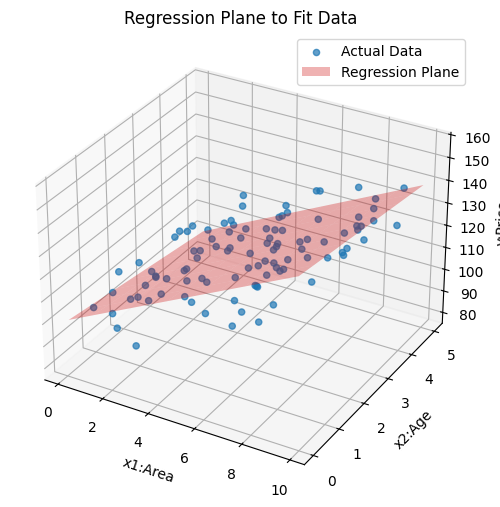

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
#產生100個樣本資料 2個特徵
X_multi = np.random.rand(100,2)
X_multi[:,0] =X_multi[:,0]*10 #房屋面積0-100坪
X_multi[:,1] =X_multi[:,1]*5 #屋齡0-5年
#假設多元回歸 房價 = 5 * 面積 - 2 * 屋齡 +100 + 隨機噪音
Y_multi = 5*X_multi[:,0] - 2*X_multi[:,1] + 100 + np.random.randn(100)*10
Y_multi = Y_multi.reshape(-1,1)#向量形狀(1,100)轉換為(100,1)
# print(Y_multi)
# print(Y_multi.flatten())#flatten向量形狀壓平
learned_w1 = 5
learned_w2 = -2
learned_b = 100
#Y_pred = w1 * x1 + w2 * x2 + b
Y_pred = learned_w1 * X_multi[:,0] + learned_w2 * X_multi[:,1] + learned_b

x1_surf = np.linspace(X_multi[:,0].min(),X_multi[:,0].max(),10) #超平面的x座標陣列
x2_surf = np.linspace(X_multi[:,1].min(),X_multi[:,1].max(),10) #超平面的y座標陣列
x1_surf,x2_surf = np.meshgrid(x1_surf,x2_surf)

Y_surf = learned_w1 * x1_surf + learned_w2 * x2_surf +learned_b


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')#第一行 第一列 第一個 projection='3d' 3D投影
ax.scatter(X_multi[:,0].flatten(),X_multi[:,1].flatten(),Y_multi.flatten(),label='Actual Data',alpha=0.7)
ax.plot_surface(x1_surf,x2_surf,Y_surf,color="red",alpha=0.3,label='Regression Plane')
ax.set_title('Regression Plane to Fit Data')
ax.set_xlabel('x1:Area')
ax.set_ylabel('x2:Age')
ax.set_zlabel('y:Price')
plt.legend()
plt.show()

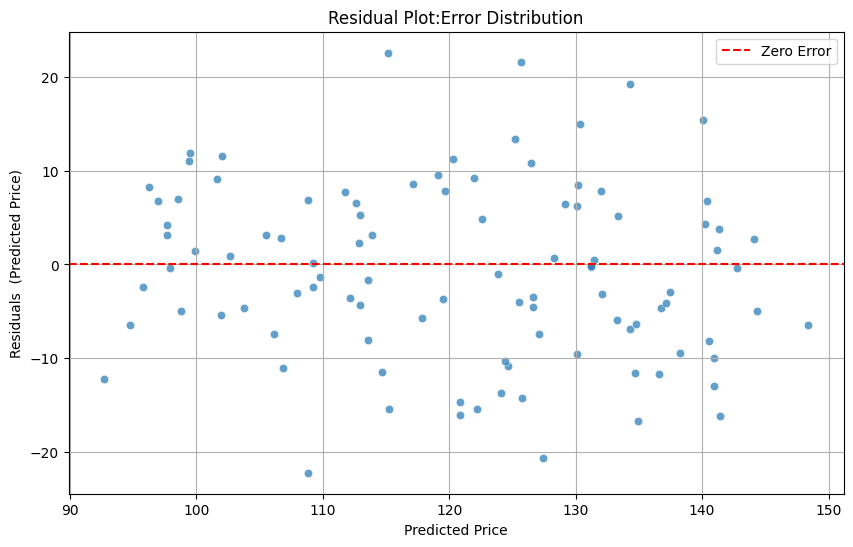

In [8]:
from matplotlib.lines import lineStyles
import seaborn as sns
residuals = Y_multi.flatten() - Y_pred.flatten()#實際值-預測值

plt.figure(figsize=(10,6))
sns.scatterplot(x=Y_pred.flatten(),y=residuals,alpha=0.7)
plt.axhline(0,color='red',linestyle='--',label="Zero Error")
plt.xlabel('Predicted Price')
plt.ylabel('Residuals  (Predicted Price)')
plt.title('Residual Plot:Error Distribution')
plt.legend()
plt.grid(True)
plt.show()

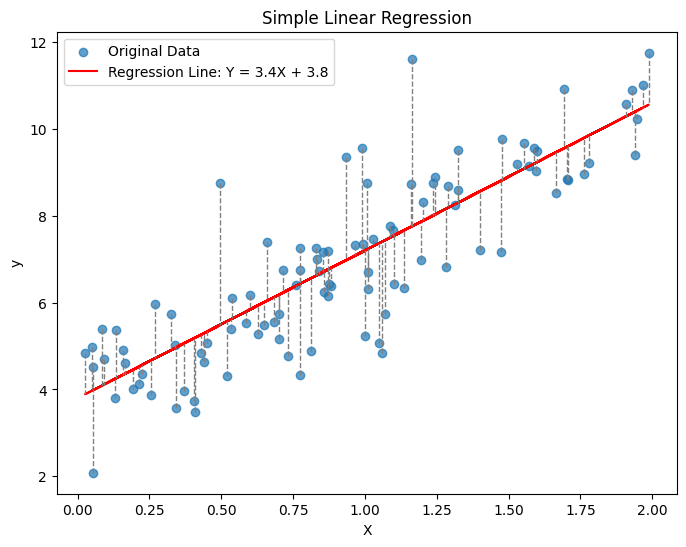

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression , LogisticRegression

np.random.seed(2)
#產生虛擬資料100筆
X = 2*np.random.rand(100,1)
y = 4+ 3*X + np.random.randn(100,1)
#模型建立
#線性回歸方程式假設: y = 3.8 + 3.4X
random_w = 3.4
random_b = 3.8

#預測
y_pred = random_w * X + random_b
#計算殘差
residuals = y -y_pred
#計算殘差平方
squared_residuals = residuals**2
#計算SSR(Sum of squared Residuals)
ssr = np.sum(squared_residuals)

#視覺化
# 設定圖表大小
plt.figure(figsize=(8,6))
# 繪製原始資料的散佈圖
plt.scatter(X,y,label='Original Data',alpha=0.7)
plt.plot(X, y_pred, color='red',label=f'Regression Line: Y = {random_w:.1f}X + {random_b:.1f}')
for i in range(len(X)):
  plt.plot([X[i], X[i]], [y[i], y_pred[i]], color='grey', linestyle='--', linewidth =1)
  

plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()#圖例
plt.show()

123.02457067588652


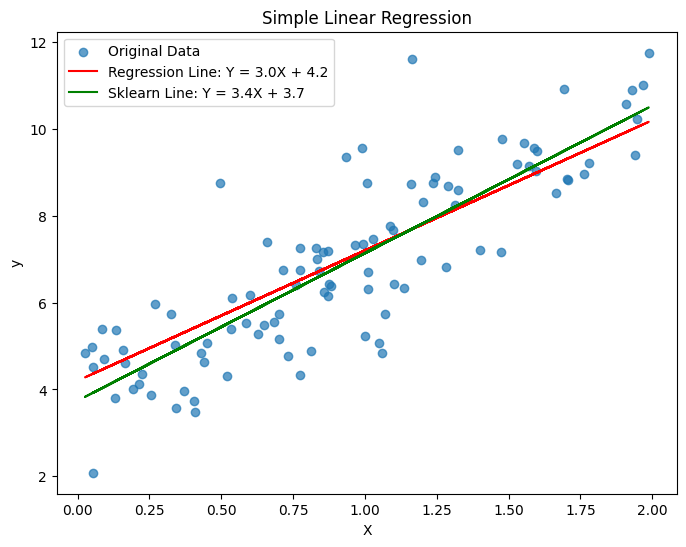

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression , LogisticRegression


np.random.seed(2)
#產生虛擬資料100筆
X = 2*np.random.rand(100,1)
y = 4+ 3*X + np.random.randn(100,1)
#模型建立
#線性回歸方程式假設: y = 3.8 + 3.4X
random_w = 3
random_b = 4.2

#預測
y_pred = random_w * X + random_b
#計算殘差
residuals = y -y_pred
#計算殘差平方
squared_residuals = residuals**2
#計算SSR(Sum of squared Residuals)
ssr = np.sum(squared_residuals)




#模型建立
model_lr = LinearRegression()
#線性回歸方程式假設: y = 3.8 + 3.4X
model_lr.fit(X,y)


# === 使用模型進行預測 ===
# 建立新的自變數資料，用來預測對應的 y 值

lr_w = model_lr.coef_[0][0]
lr_b = model_lr.intercept_[0]
#預測
lr_y_pred = model_lr.predict(X)
#計算殘差
lr_residuals = y -lr_y_pred
#計算殘差平方
lr_squared_residuals = lr_residuals**2
#計算SSR(Sum of squared Residuals)
lr_ssr = np.sum(lr_squared_residuals)
print(lr_ssr)
#視覺化
# 設定圖表大小
plt.figure(figsize=(8,6))
# 繪製原始資料的散佈圖
plt.scatter(X,y,label='Original Data',alpha=0.7)
plt.plot(X, y_pred, color='red',label=f'Regression Line: Y = {random_w:.1f}X + {random_b:.1f}')
plt.plot(X, lr_y_pred, color='green',label=f'Sklearn Line: Y = {lr_w:.1f}X + {lr_b:.1f}')
# for i in range(len(X)):
#   plt.plot([X[i], X[i]], [y[i], lr_y_pred[i]], color='grey', linestyle='--', linewidth =1)
  

plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()#圖例
plt.show()

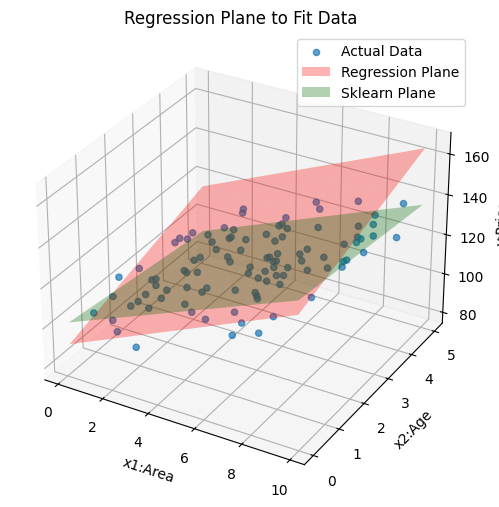

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
#原始資料
np.random.seed(0)
#產生100個樣本資料 2個特徵
X_multi = np.random.rand(100,2)
X_multi[:,0] =X_multi[:,0]*10 #房屋面積0-100坪
X_multi[:,1] =X_multi[:,1]*5 #屋齡0-5年
#假設多元回歸 房價 = 5 * 面積 - 2 * 屋齡 +100 + 隨機噪音
Y_multi = 5*X_multi[:,0] - 2*X_multi[:,1] + 100 + np.random.randn(100)*10
Y_multi = Y_multi.reshape(-1,1)#向量形狀(1,100)轉換為(100,1)
# print(Y_multi)
# print(Y_multi.flatten())#flatten向量形狀壓平
learned_w1 = 5
learned_w2 = 5
learned_b = 90
#Y_pred = w1 * x1 + w2 * x2 + b
Y_pred = learned_w1 * X_multi[:,0] + learned_w2 * X_multi[:,1] + learned_b

x1_surf = np.linspace(X_multi[:,0].min(),X_multi[:,0].max(),10) #超平面的x座標陣列
x2_surf = np.linspace(X_multi[:,1].min(),X_multi[:,1].max(),10) #超平面的y座標陣列
x1_surf,x2_surf = np.meshgrid(x1_surf,x2_surf)
Y_surf = learned_w1 * x1_surf + learned_w2 * x2_surf +learned_b

########################################################################################################
#原始資料
np.random.seed(0)
#產生100個樣本資料 2個特徵
X_multi = np.random.rand(100,2)
X_multi[:,0] =X_multi[:,0]*10 #房屋面積0-100坪
X_multi[:,1] =X_multi[:,1]*5 #屋齡0-5年
#假設多元回歸 房價 = 5 * 面積 - 2 * 屋齡 +100 + 隨機噪音
Y_multi = 5 * X_multi[:,0] - 2 * X_multi[:,1] + 100 + np.random.randn(100)*10
Y_multi = Y_multi.reshape(-1,1)#向量形狀(1,100)轉換為(100,1)

#模型建立
model_multi = LinearRegression()
model_multi.fit(X_multi,Y_multi)

# === 使用模型進行預測 ===
# 建立新的自變數資料，用來預測對應的 y 值
learned_w_multi = model_multi.coef_[0]
learned_b_multi = model_multi.intercept_[0]
Y_pred_sklearn_multi = model_multi.predict(X_multi)

#Z座標
sk_Y_surf = learned_w_multi[0] * x1_surf + learned_w_multi[1] * x2_surf +learned_b_multi


# #繪圖
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')#第一行 第一列 第一個 projection='3d' 3D投影
ax.scatter(X_multi[:,0].flatten(),X_multi[:,1].flatten(),Y_multi.flatten(),label='Actual Data',alpha=0.7)
#手動建置
ax.plot_surface(x1_surf,x2_surf,Y_surf,color="red",alpha=0.3,label='Regression Plane')

#model建置
ax.plot_surface(x1_surf,x2_surf,sk_Y_surf,color="green",alpha=0.3,label='Sklearn Plane')

ax.set_title('Regression Plane to Fit Data')
ax.set_xlabel('x1:Area')
ax.set_ylabel('x2:Age')
ax.set_zlabel('y:Price')
plt.legend()
plt.show()

練習題 6

假設你現在是市場分析師，想要預測一個產品的月銷售額 (Y)，你有以下三個特徵：

廣告投入 (X1)：單位為萬元

促銷活動次數 (X2)：單位為次

季節影響 (X3)：假設為數值變數，例如春季=1、夏季=2、秋季=3、冬季=4

請你：

生成包含三個特徵的模擬數據和對應的月銷售額數據

設置一個你認為合理的真實關係（例如）：

銷售額=10×廣告投入+50×促銷活動次數−20×季節影響+500+噪聲

確保 X3（季節影響）的數據點為 1, 2, 3, 4 的重複，用以模擬類別變量。

使用 LinearRegression 訓練模型。

印出學習到的所有權重和截距。

根據你印出的參數，用文字詳細解釋每個變數的實際意義，就像範例中做的那樣。

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error,r2_score

np.random.seed(0)
num_samples = 200
X_sales = np.zeros((num_samples,3))
X_sales[:,0] = np.random.rand(num_samples) * 50 + 10
X_sales[:,1] = np.random.randint(1, 6, num_samples)
X_sales[:,2] = np.random.randint(1, 5, num_samples)

Y_sales = 10 * X_sales[:,0] + 50 * X_sales[:,1] - 20 * X_sales[:,2] + 500 + np.random.random(num_samples) * 30

model_sales = LinearRegression()
model_sales.fit(X_sales,Y_sales)
w1,w2,w3 = model_sales.coef_
b = model_sales.intercept_

print(f"Y = {w1:.2f}x1 + {w2:.2f}x2 + {w3:.2f}x3 + {b:.2f}")

Y_sales_pred = model_sales.predict(X_sales)
mae = mean_absolute_error(Y_sales,Y_sales_pred)
mape = mean_absolute_percentage_error(Y_sales,Y_sales_pred)
mse = mean_squared_error(Y_sales,Y_sales_pred)
rmse = root_mean_squared_error(Y_sales,Y_sales_pred)
r2 = r2_score(Y_sales,Y_sales_pred)

print(f"mae={mae:.2f}, mape={mape:.2f}, mse={mse:.2f}, rmse={rmse:.2f}, r2={r2:.2f}")

Y = 10.06x1 + 49.43x2 + -20.11x3 + 515.31
mae=7.60, mape=0.01, mse=77.67, rmse=8.81, r2=1.00


22.045781529501223
mae=0.9, mape=0.1393, mse=1.1, rmse=1.0, r2=0.66


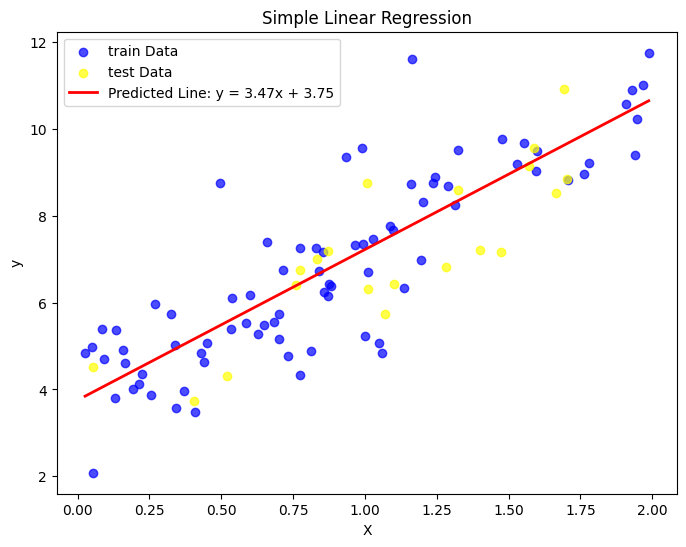

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

np.random.seed(2)
#產生虛擬資料100筆
X = 2*np.random.rand(100,1)
y = 4+ 3*X + np.random.randn(100,1)
#資料切割
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

#模型訓練
model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)
lr_w = model_lr.coef_[0][0]
lr_b = model_lr.intercept_[0]

#預測
lr_y_pred = model_lr.predict(X_test)
#計算殘差
lr_residuals = Y_test -lr_y_pred
#計算殘差平方
lr_squared_residuals = lr_residuals**2
#計算SSR(Sum of squared Residuals)
lr_ssr = np.sum(lr_squared_residuals)
print(lr_ssr)

mae = mean_absolute_error(Y_test,lr_y_pred)
mape = mean_absolute_percentage_error(Y_test,lr_y_pred)
mse = mean_squared_error(Y_test,lr_y_pred)
rmse = root_mean_squared_error(Y_test,lr_y_pred)
r2 = r2_score(Y_test,lr_y_pred)
print(f"mae={mae:.1f}, mape={mape:.4f}, mse={mse:.1f}, rmse={rmse:.1f}, r2={r2:.2f}")

#視覺化
# 設定圖表大小
plt.figure(figsize=(8,6))
# 繪製原始資料的散佈圖
plt.scatter(X_train,Y_train, color='blue', label='train Data',alpha=0.7)
plt.scatter(X_test,Y_test,color='yellow', label='test Data',alpha=0.7)

X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model_lr.predict(X_line)

plt.plot(X_line, y_line, color='red', linewidth=2,
         label=f'Predicted Line: y = {lr_w:.2f}x + {lr_b:.2f}')


# plt.plot(X, Y_test, color='red',label=f'Sklearn Line: Y = {X_test:.1f}X + {Y_test:.1f}')
# for i in range(len(X)):
#   plt.plot([X[i], X[i]], [y[i], lr_y_pred[i]], color='grey', linestyle='--', linewidth =1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()#圖例
plt.show()

作業:3d資料切割

mae=7.6, mape=0.0648, mse=93.7, rmse=9.7, r2=0.62


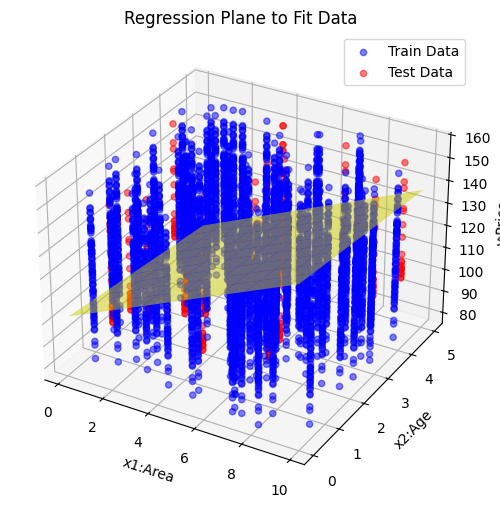

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
#原始資料
np.random.seed(0)
#產生100個樣本資料 2個特徵
X_multi = np.random.rand(100,2)
X_multi[:,0] =X_multi[:,0]*10 #房屋面積0-100坪
X_multi[:,1] =X_multi[:,1]*5 #屋齡0-5年
#假設多元回歸 房價 = 5 * 面積 - 2 * 屋齡 +100 + 隨機噪音
Y_multi = 5*X_multi[:,0] - 2*X_multi[:,1] + 100 + np.random.randn(100)*10
Y_multi = Y_multi.reshape(-1,1)#向量形狀(1,100)轉換為(100,1)

#資料切割
X_train, X_test, Y_train, Y_test = train_test_split(X_multi, Y_multi, test_size=0.2)


#模型建立
sk_model_multi = LinearRegression()
sk_model_multi.fit(X_train,Y_train)

# === 使用模型進行預測 ===
# 建立新的自變數資料，用來預測對應的 y 值
sk_model_multi_w = sk_model_multi.coef_[0]
sk_model_multi_b = sk_model_multi.intercept_[0]
#預測
Y_pred_train = sk_model_multi.predict(X_train)
Y_pred_test = sk_model_multi.predict(X_test)




#Z座標
x1_surf = np.linspace(X_multi[:,0].min(),X_multi[:,0].max(),10) #超平面的x座標陣列
x2_surf = np.linspace(X_multi[:,1].min(),X_multi[:,1].max(),10) #超平面的y座標陣列
x1_surf,x2_surf = np.meshgrid(x1_surf,x2_surf)
sk_Y_surf = sk_model_multi_w[0] * x1_surf + sk_model_multi_w[1] * x2_surf +sk_model_multi_b

#模型評估
mae = mean_absolute_error(Y_test, Y_pred_test)
mape = mean_absolute_percentage_error(Y_test,Y_pred_test)
mse = mean_squared_error(Y_test,Y_pred_test)
rmse = root_mean_squared_error(Y_test,Y_pred_test)
r2 = r2_score(Y_test,Y_pred_test)
print(f"mae={mae:.1f}, mape={mape:.4f}, mse={mse:.1f}, rmse={rmse:.1f}, r2={r2:.2f}")


# #繪圖
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')#第一行 第一列 第一個 projection='3d' 3D投影

#訓練資料
ax.scatter(X_train[:, 0], X_train[:, 1], Y_train, color='blue', alpha=0.5, label='Train Data')
#測試資料
ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, color='red', alpha=0.5, label='Test Data')
ax.plot_surface(x1_surf, x2_surf, sk_Y_surf, color="yellow", alpha=0.5)


ax.set_title('Regression Plane to Fit Data')
ax.set_xlabel('x1:Area')
ax.set_ylabel('x2:Age')
ax.set_zlabel('y:Price')
plt.legend()
plt.show()